In [34]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

random.seed(32)
%matplotlib inline

In [35]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training features data length:", len(x_train))
print("Training labels data length:", len(y_train))

Training features data length: 60000
Training labels data length: 60000


In [46]:
def data_generator(batch_size, features, labels, shuffle=True):
    
    batch_features = []
    batch_labels = []
    n_data = len(features)
    range_data = [*range(n_data)]
    idx = 0
    
    if shuffle:
        random.shuffle(range_data)
        
    while True:
        
        if idx >= n_data:
            idx = 0
        
        batch_features.append(features[range_data[idx]])
        batch_labels.append(labels[range_data[idx]])
        
        idx += 1
        
        if len(batch_features) == batch_size:
            
            yield batch_features, batch_labels

In [56]:
x, y = next(data_generator(32, x_train, y_train))

In [57]:
len(x) == len(y)

True

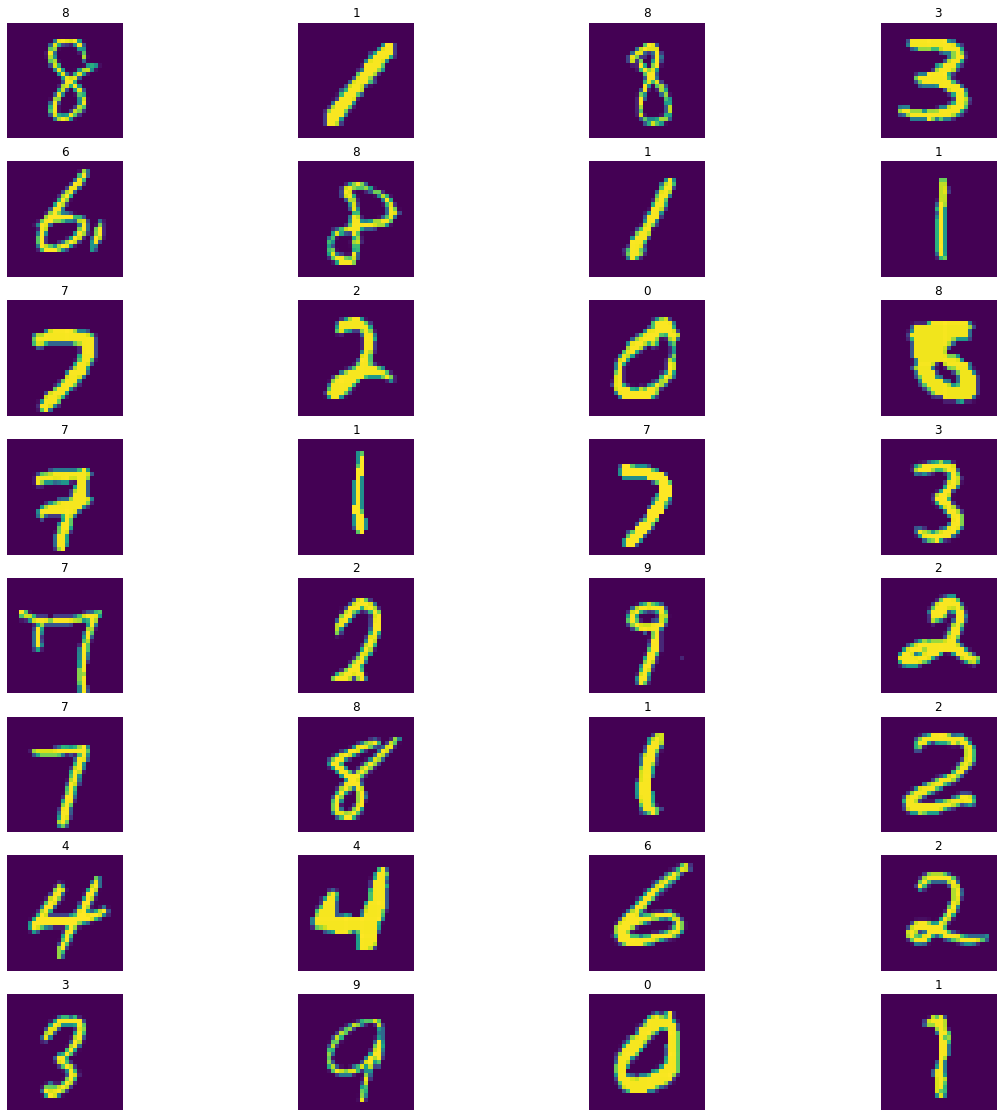

In [58]:
fig, ax = plt.subplots(8, 4, figsize=(20,20))

for (x, y, axi) in zip(x, y, ax.flatten()):
    axi.imshow(x)
    axi.set_title(y)
    
    axi.axis('off')